Epoch 1/50
174/174 - 2s - loss: 0.0108 - 2s/epoch - 13ms/step
Epoch 2/50
174/174 - 0s - loss: 0.0039 - 251ms/epoch - 1ms/step
Epoch 3/50
174/174 - 0s - loss: 0.0030 - 253ms/epoch - 1ms/step
Epoch 4/50
174/174 - 0s - loss: 0.0027 - 257ms/epoch - 1ms/step
Epoch 5/50
174/174 - 0s - loss: 0.0025 - 254ms/epoch - 1ms/step
Epoch 6/50
174/174 - 0s - loss: 0.0024 - 262ms/epoch - 2ms/step
Epoch 7/50
174/174 - 0s - loss: 0.0023 - 257ms/epoch - 1ms/step
Epoch 8/50
174/174 - 0s - loss: 0.0023 - 260ms/epoch - 1ms/step
Epoch 9/50
174/174 - 0s - loss: 0.0021 - 291ms/epoch - 2ms/step
Epoch 10/50
174/174 - 0s - loss: 0.0022 - 267ms/epoch - 2ms/step
Epoch 11/50
174/174 - 0s - loss: 0.0021 - 266ms/epoch - 2ms/step
Epoch 12/50
174/174 - 0s - loss: 0.0020 - 265ms/epoch - 2ms/step
Epoch 13/50
174/174 - 0s - loss: 0.0020 - 264ms/epoch - 2ms/step
Epoch 14/50
174/174 - 0s - loss: 0.0020 - 256ms/epoch - 1ms/step
Epoch 15/50
174/174 - 0s - loss: 0.0020 - 290ms/epoch - 2ms/step
Epoch 16/50
174/174 - 0s - loss: 0.0

c:\Users\mitja\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


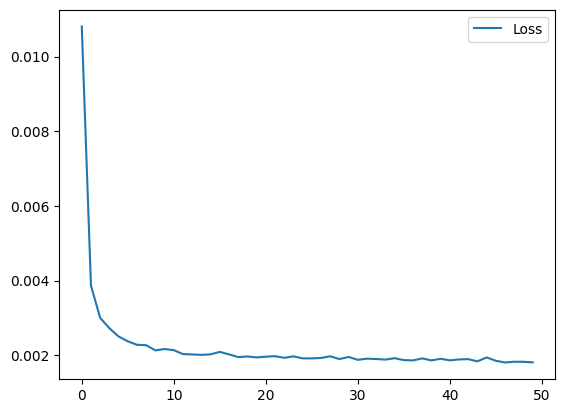

In [2]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import joblib
import matplotlib.pyplot as plt

data = pd.read_csv('RV3_IIR_SIPIA.csv')
data['date'] = pd.to_datetime(data['Date'])
data.sort_values(by='date', inplace=True)
data.set_index('date', inplace=True)
data_interpolated = data.interpolate(method='linear')
data_interpolated = data_interpolated[['PM10']]
data_array = data_interpolated.values.astype(float)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_array)


def create_dataset(dataset, window_size):
    X, y = [], []
    for i in range(len(dataset) - window_size):
        X.append(dataset[i:i+window_size])
        y.append(dataset[i+window_size])
    return np.array(X), np.array(y)


window_size = 64
X, y = create_dataset(data_scaled, window_size)
X = X.reshape(-1, 1, window_size)

def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(16, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(16))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    return model

model = build_model((1, window_size))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X, y, epochs=50, verbose=2)

model.save('lstm_model.h5')
joblib.dump(scaler, 'scaler_pm10.pkl')

plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.show()